<a href="https://colab.research.google.com/github/Mahnazshamissa/Python/blob/main/Asigmo_Satellite_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentinelsat

In [ ]:
!pip install folium
!pip install geopandas

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 10.9MB 13.0MB/s 
     |████████████████████████████████| 14.8MB 325kB/s 


In [ ]:
!pip install shapely

In [ ]:
!pip install rasterio

     |████████████████████████████████| 18.3MB 237kB/s 


In [ ]:
from sentinelsat import SentinelAPI

user = 'estambolieva' 
password = 'Asigmo_Test_123' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [ ]:
import geopandas as gpd
import folium 

nReserve = gpd.read_file('https://raw.githubusercontent.com/estambolieva/asigmo_coursework2/main/sat_images/data/Rome.shp')

m = folium.Map([41.7023292727353, 12.34697305914639], zoom_start=12)
folium.GeoJson(nReserve).add_to(m)
m

In [ ]:
from shapely.geometry import MultiPolygon, Polygon

geojson_shape = None
for i in nReserve['geometry']:
    geojson_shape = i

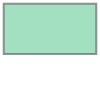

In [ ]:
geojson_shape

In [ ]:
# now we get the shape we have and request the satellite image for that shape from Corpernicus
products = api.query(footprint,
                     date = ('20201012', '20201022'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,10)
                    ) # we expect to have one new satellite image every 5 days

In [ ]:
products

OrderedDict([('e9e03fc6-614c-455c-ab09-7dc9742b71e2',
              {'beginposition': datetime.datetime(2020, 10, 20, 10, 9, 49, 25000),
               'cloudcoverpercentage': 9.641552,
               'endposition': datetime.datetime(2020, 10, 20, 10, 9, 49, 25000),
               'filename': 'S2B_MSIL2A_20201020T100949_N0214_R022_T33TTG_20201020T130214.SAFE',
               'footprint': 'MULTIPOLYGON (((11.410731332148327 41.407726190110715, 12.10017277554854 41.42531864860135, 12.1390661889812 41.53015106653712, 12.193509009229226 41.67631406995252, 12.248315354564562 41.822437360503535, 12.30311144352408 41.96855643751843, 12.328122467810774 42.03538707089045, 12.35743749843932 42.11387482352044, 12.3713536875108 42.15046046186476, 12.41308253436967 42.26059938303574, 12.468261737866504 42.40654449925282, 12.474816248616987 42.42382694648469, 11.354954233772318 42.39470139413761, 11.410731332148327 41.407726190110715)))',
               'format': 'SAFE',
               'gmlfootprint

In [ ]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,vegetationpercentage,notvegetatedpercentage,waterpercentage,unclassifiedpercentage,mediumprobacloudspercentage,highprobacloudspercentage,snowicepercentage,cloudcoverpercentage,level1cpdiidentifier,format,processingbaseline,platformname,filename,instrumentname,instrumentshortname,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
f92b6b08-be0d-45dd-b7ac-c98b5d2cbae5,S2B_MSIL2A_20201020T100949_N0214_R022_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-10-20T10:09:49.025Z, Instrument: MS...",2020-10-20 10:09:49.025,2020-10-20 10:09:49.025,2020-10-21 02:58:48.167,18924,22,25.762191,6.821696,56.622642,0.940005,0.303587,0.634369,0.000111,8.357844,S2B_OPER_MSI_L1C_TL_VGS2_20201020T122313_A0189...,SAFE,02.14,Sentinel-2,S2B_MSIL2A_20201020T100949_N0214_R022_T32TQM_2...,Multi-Spectral Instrument,MSI,574.93 MB,GS2B_20201020T100949_018924_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20201020T100949_N0214_R022_T32TQM_2...,f92b6b08-be0d-45dd-b7ac-c98b5d2cbae5,"MULTIPOLYGON (((12.09825 41.42015, 12.13907 41..."
e9e03fc6-614c-455c-ab09-7dc9742b71e2,S2B_MSIL2A_20201020T100949_N0214_R022_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-10-20T10:09:49.025Z, Instrument: MS...",2020-10-20 10:09:49.025,2020-10-20 10:09:49.025,2020-10-21 03:02:23.252,18924,22,24.696709,6.372757,56.953114,0.894747,0.348493,0.731571,0.000131,9.641552,S2B_OPER_MSI_L1C_TL_VGS2_20201020T122313_A0189...,SAFE,02.14,Sentinel-2,S2B_MSIL2A_20201020T100949_N0214_R022_T33TTG_2...,Multi-Spectral Instrument,MSI,592.62 MB,GS2B_20201020T100949_018924_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20201020T100949_N0214_R022_T33TTG_2...,e9e03fc6-614c-455c-ab09-7dc9742b71e2,"MULTIPOLYGON (((11.41073 41.40773, 12.10017 41..."


In [ ]:
api.download("e9e03fc6-614c-455c-ab09-7dc9742b71e2")

Downloading: 100%|██████████| 621M/621M [00:48<00:00, 12.8MB/s]
MD5 checksumming: 100%|██████████| 621M/621M [00:01<00:00, 421MB/s]


{'Creation Date': datetime.datetime(2020, 10, 21, 3, 5, 12, 993000),
 'Ingestion Date': datetime.datetime(2020, 10, 21, 3, 2, 23, 252000),
 'Online': True,
 'date': datetime.datetime(2020, 10, 20, 10, 9, 49, 25000),
 'downloaded_bytes': 621462673,
 'footprint': 'POLYGON((12.474816248616987 42.42382694648469,12.468261737866504 42.40654449925282,12.41308253436967 42.26059938303574,12.3713536875108 42.15046046186476,12.35743749843932 42.11387482352044,12.328122467810774 42.03538707089045,12.30311144352408 41.96855643751843,12.248315354564562 41.822437360503535,12.193509009229226 41.67631406995252,12.1390661889812 41.53015106653712,12.10017277554854 41.42531864860135,11.410731332148327 41.407726190110715,11.354954233772318 42.39470139413761,12.474816248616987 42.42382694648469))',
 'id': 'e9e03fc6-614c-455c-ab09-7dc9742b71e2',
 'md5': '9916913A44E7FF674501419E76DBDFD4',
 'path': './S2B_MSIL2A_20201020T100949_N0214_R022_T33TTG_20201020T130214.zip',
 'size': 621462673,
 'title': 'S2B_MSIL2A_



# Let's build the RGB Image



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/Consulting/2020/Asigmo/R10m'

T33TTG_20201020T100949_AOT_10m.jp2  T33TTG_20201020T100949_B08_10m.jp2
T33TTG_20201020T100949_B02_10m.jp2  T33TTG_20201020T100949_TCI_10m.jp2
T33TTG_20201020T100949_B03_10m.jp2  T33TTG_20201020T100949_WVP_10m.jp2
T33TTG_20201020T100949_B04_10m.jp2


In [ ]:
import rasterio as rio 

# Open Bands 4, 3 and 2 with Rasterio
R10 = '/content/gdrive/My Drive/Consulting/2020/Asigmo/R10m' # from my private Google Drive
b4 = rio.open(R10+'/T33TTG_20201020T100949_B04_10m.jp2')
b3 = rio.open(R10+'/T33TTG_20201020T100949_B03_10m.jp2')
b2 = rio.open(R10+'/T33TTG_20201020T100949_B02_10m.jp2')

In [ ]:
# write the RGB Image 
with rio.open('/content/gdrive/My Drive/Consulting/2020/Asigmo/RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [ ]:
# see vegetation
# Open b4 and b8
b4 = rio.open(R10+'/T33TTG_20201020T100949_B04_10m.jp2')
b8 = rio.open(R10+'/T33TTG_20201020T100949_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

with rio.open('/content/gdrive/My Drive/Consulting/2020/Asigmo/NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
b4.read()

array([[[196, 224, 210, ...,   0,   0,   0],
        [189, 214, 218, ...,   0,   0,   0],
        [209, 204, 204, ...,   0,   0,   0],
        ...,
        [  1,   4,   1, ...,   0,   0,   0],
        [ 11,   9,   2, ...,   0,   0,   0],
        [ 11,   1,   1, ...,   0,   0,   0]]], dtype=uint16)

In [ ]:
meta

{'count': 1,
 'crs': CRS.from_epsg(32633),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 10980,
 'nodata': None,
 'transform': Affine(10.0, 0.0, 199980.0,
       0.0, -10.0, 4700040.0),
 'width': 10980}

# Another Try

In [ ]:
!pip install sentinelhub

     |████████████████████████████████| 194kB 3.3MB/s 
     |████████████████████████████████| 133kB 10.1MB/s 
     |████████████████████████████████| 6.7MB 8.9MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.1.0-cp36-none-any.whl size=196404 sha256=815c46fc8a1dd015a4f89fef4adbfa83e9cd495125f9677fca276d2f887b60ce
  Stored in directory: /root/.cache/pip/wheels/90/6c/df/be1525ead52f5c2ce49f0880e73587723bf25caac7295f9db2
  Created wheel for utm: filename=utm-0.6.0-cp36-none-any.whl size=6095 sha256=1ab09d3034079e39d0e82ff9a3bafc33b4dd3d505ca3e067dc6374f6a45599c4
  Stored in directory: /root/.cache/pip/wheels/9a/76/b2/58ad7ade8b0475c577f80ee8023d7164fd561bb45c20b4beab
Successfully built sentinelhub utm
ERROR: botocore 1.19.2 has requirement urllib3<1.26,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
!pip install urllib3==1.25.10

     |████████████████████████████████| 133kB 3.4MB/s 
ERROR: kaggle 1.5.8 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.10 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from sentinelhub import SHConfig


INSTANCE_ID = 'e556f04b-a501-4574-bf86-3f2deb3acd0e'  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

In [ ]:
config

SHConfig(
  instance_id='e556f04b-a501-4574-bf86-3f2deb3acd0e',
  sh_client_id='',
  sh_client_secret='',
  sh_base_url='https://services.sentinel-hub.com',
  geopedia_wms_url='https://service.geopedia.world',
  geopedia_rest_url='https://www.geopedia.world/rest',
  aws_access_key_id='',
  aws_secret_access_key='',
  aws_metadata_url='https://roda.sentinel-hub.com',
  aws_s3_l1c_bucket='sentinel-s2-l1c',
  aws_s3_l2a_bucket='sentinel-s2-l2a',
  opensearch_url='http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2',
  max_wfs_records_per_query=100,
  max_opensearch_records_per_query=500,
  max_download_attempts=4,
  download_sleep_time=5,
  download_timeout_seconds=120,
  number_of_download_processes=1
)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import datetime
import numpy as np

import matplotlib.pyplot as plt



In [ ]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, DataCollection

In [ ]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [ ]:
betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]

In [ ]:
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

In [ ]:
wms_true_color_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C, # get this specific sentinel product
    layer='TRUE_COLOR', # get this specific image type
    bbox=betsiboka_bbox, # give us the bounding box
    time='2020-10-15', # acquisition date, use 'latest' to get the latest image
    width=512,
    height=856,
    config=config
)

In [ ]:
wms_true_color_img = wms_true_color_request.get_data()

In [ ]:
print('Returned data is of type = %s and length %d.' % (type(wms_true_color_img[0]), len(wms_true_color_img[0])))

Returned data is of type = <class 'numpy.ndarray'> and length 856.


In [ ]:
print('Single element in the list is of type {} and has shape {}'.format(type(wms_true_color_img[0][-1]),
                                                                         wms_true_color_img[-1].shape))



Single element in the list is of type <class 'numpy.ndarray'> and has shape (856, 512, 4)


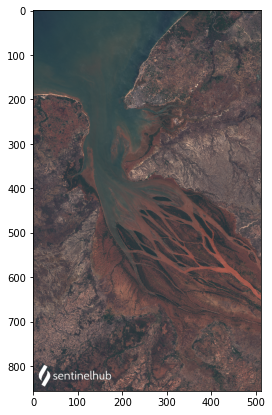

In [ ]:
plot_image(wms_true_color_img[-1])

In [ ]:
print('The latest Sentinel-2 image of this area was taken on {}.'.format(wms_true_color_request.get_dates()[-1]))

The latest Sentinel-2 image of this area was taken on 2020-10-15 07:14:12.


In [ ]:
# Let's get more than 1 images
wms_true_color_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer='TRUE_COLOR',
    bbox=betsiboka_bbox,
    time=('2020-05-01', '2020-10-21'),
    width=512,
    height=856,
    config=config
)

In [ ]:
wms_true_color_imgs = wms_true_color_request.get_data()

In [ ]:
print('There are %d Sentinel-2 images available for May 2020.' % len(wms_true_color_imgs))

There are 35 Sentinel-2 images available for May 2020.


In [ ]:
wms_true_color_request.get_dates()

[datetime.datetime(2020, 5, 3, 7, 14, 3),
 datetime.datetime(2020, 5, 8, 7, 14, 11),
 datetime.datetime(2020, 5, 13, 7, 14, 6),
 datetime.datetime(2020, 5, 18, 7, 14, 12),
 datetime.datetime(2020, 5, 23, 7, 14, 7),
 datetime.datetime(2020, 5, 28, 7, 14, 13),
 datetime.datetime(2020, 6, 2, 7, 14, 8),
 datetime.datetime(2020, 6, 7, 7, 14, 13),
 datetime.datetime(2020, 6, 12, 7, 14, 9),
 datetime.datetime(2020, 6, 17, 7, 14, 13),
 datetime.datetime(2020, 6, 22, 7, 14, 9),
 datetime.datetime(2020, 6, 27, 7, 14, 12),
 datetime.datetime(2020, 7, 2, 7, 14, 9),
 datetime.datetime(2020, 7, 7, 7, 14, 11),
 datetime.datetime(2020, 7, 12, 7, 14, 8),
 datetime.datetime(2020, 7, 17, 7, 14, 12),
 datetime.datetime(2020, 7, 22, 7, 14, 9),
 datetime.datetime(2020, 7, 27, 7, 14, 12),
 datetime.datetime(2020, 8, 1, 7, 14, 10),
 datetime.datetime(2020, 8, 6, 7, 14, 13),
 datetime.datetime(2020, 8, 11, 7, 14, 10),
 datetime.datetime(2020, 8, 16, 7, 14, 13),
 datetime.datetime(2020, 8, 21, 7, 14, 10),
 date

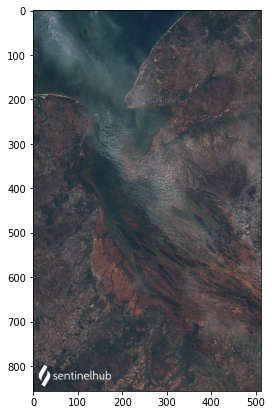

In [ ]:
plot_image(wms_true_color_imgs[2]) # <- oh, we see some clouds here


In [ ]:
wms_true_color_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer='TRUE_COLOR',
    bbox=betsiboka_bbox,
    time=('2017-12-01', '2017-12-31'),
    width=512, height=856,
    maxcc=0.3, # less than 30 % cloud coverage
    config=config
)

In [ ]:
wms_true_color_imgs = wms_true_color_request.get_data()

In [ ]:
print('There are %d Sentinel-2 images available for December 2017 with cloud coverage less ' \
      'than %1.0f%%.' % (len(wms_true_color_imgs), wms_true_color_request.maxcc * 100.0))

There are 2 Sentinel-2 images available for December 2017 with cloud coverage less than 30%.


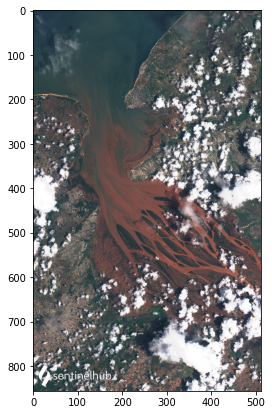

In [ ]:
plot_image(wms_true_color_imgs[-1])
cloudy_image = wms_true_color_imgs[-1]

In [ ]:
print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

These 1 images were taken on the following dates:
 - image 0 was taken on 2017-12-15 07:12:03
 - image 1 was taken on 2017-12-20 07:12:10


In [ ]:
from sentinelhub import CustomUrlParam

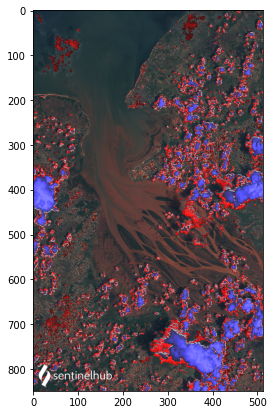

In [ ]:
# by Braaten, Cohen, Yang 2015
my_evalscript = '''
var bRatio = (B01 - 0.175) / (0.39 - 0.175);
var NGDR = (B01 - B02) / (B01 + B02);

function clip(a) {
    return a>0 ? (a<1 ? a : 1) : 0;
}

if (bRatio > 1) {
    var v = 0.5*(bRatio - 1);
    return [0.5*clip(B04), 0.5*clip(B03), 0.5*clip(B02) + v];
}

if (bRatio > 0 && NGDR > 0) {
    var v = 5 * Math.sqrt(bRatio * NGDR);
    return [0.5 * clip(B04) + v, 0.5 * clip(B03), 0.5 * clip(B02)];
}

return [2*B04, 2*B03, 2*B02];
'''

evalscript_wms_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer='TRUE_COLOR', # Layer parameter can be any existing Sentinel-2 L1C layer
    bbox=betsiboka_bbox,
    time='2017-12-20',
    width=512,
    custom_url_params={CustomUrlParam.EVALSCRIPT: my_evalscript},
    config=config
)

evalscript_wms_data = evalscript_wms_request.get_data()
plot_image(evalscript_wms_data[0])

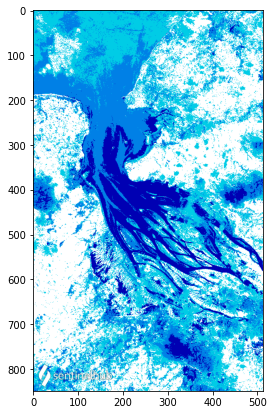

In [ ]:
# calculate the moisture index
my_url = 'https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/ndmi_special/script.js'

evalscripturl_wms_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer='TRUE_COLOR', # Layer parameter can be any existing Sentinel-2 L1C layer
    bbox=betsiboka_bbox,
    time='2017-12-20',
    width=512,
    custom_url_params={CustomUrlParam.EVALSCRIPTURL: my_url},
    config=config
)

evalscripturl_wms_data = evalscripturl_wms_request.get_data()
plot_image(evalscripturl_wms_data[0])